This is going to be an attempt to standardise the search for the curves for the compoinds based on heir % of max responce.

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

file_path = 'Worksession 2.xlsx'
experiment1_data = pd.read_excel(file_path, sheet_name=0)
experiment1_data

,Concentration (nmol/l),Ixychlofen (% maximal),Ibuprophen (% maximal)
0,0.3,19.6,2.2
1,1.0,45.4,6.9
2,3.0,71.4,18.1
3,10.0,89.3,42.4
4,30.0,96.2,68.9
5,100.0,98.8,88.1


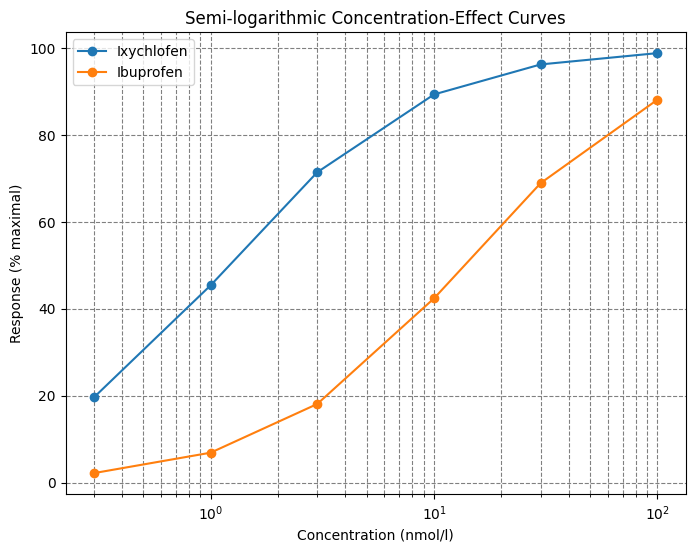

Response Levels:  [20. 40. 60. 80.]
Equiactive concentrations of Ixychlofen:  [0.31085271 0.85348837 2.12307692 6.36312849]
Equiactive concentrations of Ibuprofen:  [ 3.5473251   9.30864198 23.28301887 70.46875   ]
M values:  [0.08763017 0.09168774 0.09118564 0.09029717]
EC50 for Ixychlofen:  1.353846153846154
EC50 for Ibuprofen:  15.735849056603772


In [2]:
# Step 1: Make semi-logarithmic concentration-effect curves for ixychlofen and ibuprofen

# Get the data
concentration = experiment1_data['Concentration (nmol/l)'].values
response_ixychlofen = experiment1_data['Ixychlofen (% maximal)'].values
response_ibuprofen = experiment1_data['Ibuprophen (% maximal)'].values

# Plot the curves
plt.figure(figsize=(8,6))
plt.semilogx(concentration, response_ixychlofen, marker='o', linestyle='-', label='Ixychlofen')
plt.semilogx(concentration, response_ibuprofen, marker='o', linestyle='-', label='Ibuprofen')

plt.xlabel('Concentration (nmol/l)')
plt.ylabel('Response (% maximal)')
plt.title('Semi-logarithmic Concentration-Effect Curves')
plt.grid(True, which="both", ls="--", c='gray')
plt.legend()
plt.show()

# Step 3: Calculate M, the ratio of equiactive concentrations

# Interpolating the data to find equiactive concentrations
interp_ixychlofen = interp1d(response_ixychlofen, concentration)
interp_ibuprofen = interp1d(response_ibuprofen, concentration)

# Finding equiactive concentrations at various common response levels
response_levels = np.linspace(20, 80, 4)  # Taking four response levels between 20% and 80%
equiactive_concentrations_ixychlofen = interp_ixychlofen(response_levels)
equiactive_concentrations_ibuprofen = interp_ibuprofen(response_levels)

# Calculating M at each response level
M_values = equiactive_concentrations_ixychlofen / equiactive_concentrations_ibuprofen

# Interpolating to find the EC50 values (concentration at 50% of the maximal response)
EC50_ixychlofen = interp_ixychlofen(50)
EC50_ibuprofen = interp_ibuprofen(50)

# Print the results
print("Response Levels: ", response_levels)
print("Equiactive concentrations of Ixychlofen: ", equiactive_concentrations_ixychlofen)
print("Equiactive concentrations of Ibuprofen: ", equiactive_concentrations_ibuprofen)
print("M values: ", M_values)
print("EC50 for Ixychlofen: ", EC50_ixychlofen)
print("EC50 for Ibuprofen: ", EC50_ibuprofen)

They would liekly testing it on cyclooxygenase (enzyme) + arachedinic acid (substrate) measure how many 


In [3]:
# Load the data
file_path = 'Worksession 2.xlsx'
experiment2_data = pd.read_excel(file_path, sheet_name=1)
experiment2_data

,Terazosine (M),EC50 (M),EC50' (M)
0,0,"3,2*10^(-5)",NaN
1,7*10^(-9),NaN,"2,2*10^(-4)"
2,10^(-8),NaN,"3,0*10^(-4)"
3,3*10^(-8),NaN,"8,3*10^(-4)"
4,10^(-7),NaN,"2,7*10^(-3)"


In [4]:

# Replace NaN values in the EC50 column with the correct value (3.2e-5)
experiment2_data['EC50 (M)'].fillna(3.2e-5, inplace=True)

# Replace NaN values in the EC50' column with the correct values
experiment2_data["EC50' (M)"].iloc[1:] = [2.2e-4, 3.0e-4, 8.3e-4, 2.7e-3]

# Display the data to ensure it's correct
print(experiment2_data)

  Terazosine (M)     EC50 (M) EC50' (M)
0              0  3,2*10^(-5)       NaN
1      7*10^(-9)     0.000032   0.00022
2        10^(-8)     0.000032    0.0003
3      3*10^(-8)     0.000032   0.00083
4        10^(-7)     0.000032    0.0027


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Replace the value in the 'EC50 (M)' column in the first row with a proper numeric value
experiment2_data.at[0, 'EC50 (M)'] = 0.000032

# Calculate the dose ratios using values from rows indexed 1 to 4
EC50 = experiment2_data.loc[1:4, 'EC50 (M)'].values
EC50_prime = experiment2_data.loc[1:4, "EC50' (M)"].values

dose_ratios = EC50_prime / EC50

# Calculate values for the Schild plot
log_dr_minus1 = np.log10(dose_ratios - 1)
neg_log_antagonist_concentration = -np.log10(experiment2_data.loc[1:4, 'Terazosine (M)'].values)

# Create the Schild plot
plt.plot(neg_log_antagonist_concentration, log_dr_minus1)
plt.xlabel('-log [Antagonist] (M)')
plt.ylabel('log (dr-1)')
plt.title('Schild Plot')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()


TypeError: loop of ufunc does not support argument 0 of type float which has no callable log10 method